In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from classy import Class

In [2]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1,1]
#z_Nbody = [0,100]
z_Nbody = [0,5,10,50,100,500,1000]
cosmo = {}
for key in z_Nbody:
    radiation_source = 1
    gamma_source = 1
    cosmo[key] = Class()
    z_init = key
    cosmo[key].set({'output':'mPk dTk vTk lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'a_init_nbody': 1./(z_init+1.),
           'switch_radiation_source':radiation_source,
           'switch_gamma':gamma_source,
           'radiation_streaming_approximation':3,
           'ur_fluid_approximation':2,
           'l_max_g':100,
           'l_max_ur':100,
           'l_max_pol_g':100, 
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':60,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'P_k_max_h/Mpc' : 1.,
           'evolver':0,
           'tol_perturb_integration':0.000001,
           'tol_background_integration':1e-8,
           'back_integration_stepsize':1e-3,
           'perturb_sampling_stepsize':0.01,
           'tol_thermo_integration':1e-5,
           'Omega_cdm':0.12,
           'Omega_ini_dcdm':0.12,
           'Gamma_dcdm':30
            })
    cosmo[key].compute()

In [3]:
figwidth1 = 4.4 #=0.7*6.3
figwidth2 = 6.3
ratio = 8.3/11.7
figheight1 = figwidth1*ratio
figheight2 = figwidth2*ratio

lw=2
fs=12
labelfs=16

DecayMetricPotentialsk00001.pdf
DecayMetricPotentialsk0001.pdf
DecayMetricPotentialsk001.pdf
DecayMetricPotentialsk01.pdf
DecayMetricPotentialsk1.pdf


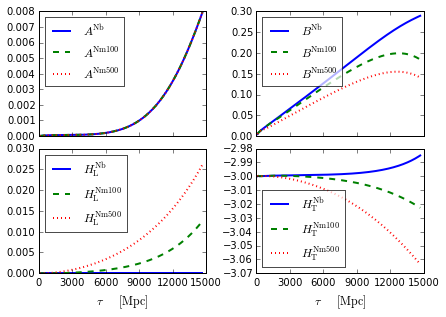

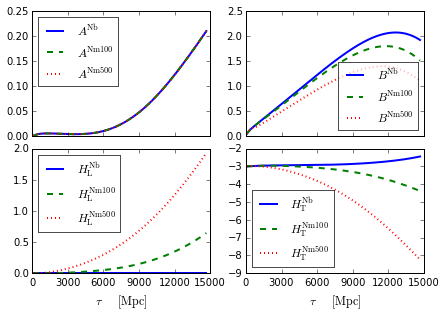

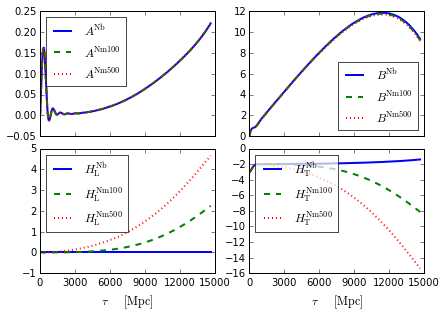

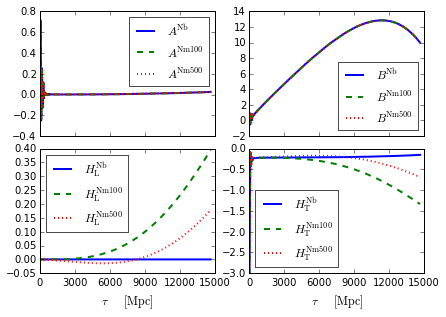

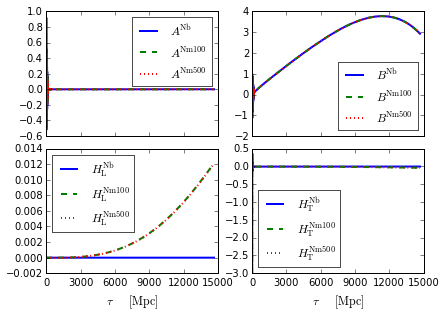

In [19]:
for kidx,k in enumerate(k_out):
    pt0 = cosmo[0].get_perturbations()['scalar'][kidx]
    pt50 = cosmo[50].get_perturbations()['scalar'][kidx]
    pt100 = cosmo[100].get_perturbations()['scalar'][kidx]
    pt500 = cosmo[500].get_perturbations()['scalar'][kidx]
    
    tau100 = pt100['tau [Mpc]']
    tau500 = pt500['tau [Mpc]']
    tau50 = pt50['tau [Mpc]']
    tau0 = pt0['tau [Mpc]']

    Nx=2
    Ny=2

    f, axes = plt.subplots(2,2,sharex=True,figsize=(figwidth2,figheight2))

    pttype = [['A_nm','B_nm'],['H_L_nm','H_T_nm']]
    texnames = {'H_L_nm':r'H_\mathrm{L}','H_T_nm':r'H_\mathrm{T}','A_nm':'A','B_nm':'B'}
    
    #if kidx==2:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper right','A_nm':'upper right','B_nm':'lower right'}
    #elif kidx==0:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper left','A_nm':'lower right','B_nm':'lower right'}
    if kidx==2:
        legpos = {'H_L_nm':'upper left','H_T_nm':'upper left','A_nm':'best','B_nm':'best'}
#        legpos = {'H_L_nm':'lower left','H_T_nm':'lower left','A_nm':'best','B_nm':'best'}
    else:
        legpos = {'H_L_nm':'best','H_T_nm':'best','A_nm':'best','B_nm':'best'}
    yscale = {'H_L_nm':'linear','H_T_nm':'linear','A_nm':'log','B_nm':'log'}
    ylimits = {'H_L_nm':[-0.01,0.2],'H_T_nm':[1.4,4.5],'A_nm':[1e-7,1e2],'B_nm':[1e-1,1e2]}
    
    def trsf(y,ptt):
        if ptt[0]=='H':
            return y
        else:
#            return np.abs(y)
            return y

    
    for i in range(Nx):
        for j in range(Ny):
            ptt = pttype[i][j]
            ax = axes[i][j]
                
            ax.plot(tau0,trsf(pt0[ptt],ptt),lw=lw)
            #ax.plot(tau50,trsf(pt50[ptt],ptt),ls='-.',lw=lw)
            ax.plot(tau100,trsf(pt100[ptt],ptt),ls='--',lw=lw)
            ax.plot(tau500,trsf(pt500[ptt],ptt),ls=':',lw=lw)
            leg = ['$'+texnames[ptt]+r'^\mathrm{Nb}$',
            #       '$'+texnames[ptt]+r'^\mathrm{Nm50}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm100}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm500}$']
            ax.legend(leg,ncol=1,loc=legpos[ptt],fontsize=fs, framealpha=0.7) #,labelspacing=0.2
            #ax.legend(leg,ncol=2,loc=legpos[ptt],fontsize=fs, framealpha=0.7,
            #         columnspacing=0.9,handletextpad=0.1)
            #,borderpad=0.2, labelspacing=0.1,  handletextpad=0.1, handlelength=0.004,borderaxespad=0.3) #,labelspacing=0.2
            ax.set_xlim([0,15000])
            #if kidx==2:
            #    ax.set_ylim(ylimits[ptt])
            #elif ptt=='H_L_nm':
            #    yls = ax.get_ylim()
            #    ax.set_ylim([yls[0]-0.05*yls[1],yls[1]])
            #ax.set_yscale(yscale[ptt])
            #if kidx==1:
            #    if ptt=='H_L_nm':
            #        ax.set_ylim([-0.1,0.7])
            #elif kidx==2:
            #    if ptt=='H_L_nm':
            #        ax.set_ylim([-0.2,0.6])
            #    elif ptt=='H_T_nm':
            #        ax.set_ylim([-3.0, 0.5])
            ax.set_xticks([kk*3000 for kk in range(6)])
    for j in range(2):
        axes[1,j].set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$',fontsize=fs)
    f.tight_layout()
    if kidx==0:
        f.subplots_adjust(wspace=0.3, hspace=0.1)
    else:
        f.subplots_adjust(wspace=0.2, hspace=0.1)
    fname = 'DecayMetricPotentialsk'+str(k).replace('.','')+'.pdf'
    print fname
    f.savefig(fname, bbox_inches='tight')  

In [6]:
tk = cosmo[0].get_transfer()
print tk.viewkeys()

dict_keys(['theta_N', 'd_dr', 't_ur', 'd_dcdm', 'delta_N', 't_cdm', 'theta_Nb', 't_b', 'd_tot', 'L_prime', 't_g', 'L', 't_dr', 'd_ur', 't_dcdm', 'delta_Nb', 'd_cdm', 'd_b', 't_tot', 'd_g', 'k (h/Mpc)'])


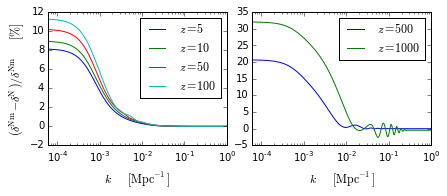

In [7]:
f, ax = plt.subplots(1,2,figsize=(figwidth2,0.9*figheight1),sharex=True)
leg1 = []
leg2 = []
refkey = 0
cosmoref = cosmo[refkey]

href = cosmoref.h()
tkref = cosmoref.get_transfer(0.)
kref = tkref['k (h/Mpc)']*href
delnb = tkref['delta_N']

#z_plot = [800, 600, 500, 400, 200, 100, 75, 50, 10, 5 , 0]
z_plot = [0,5,10,50,100,500,1000]
for key in z_plot:
    if key==refkey:
        continue
    h = cosmo[key].h()
    tk = cosmo[key].get_transfer(0.)

    bg = cosmo[key].get_background()
    H = bg['H [1/Mpc]'][-1]
    rho_cdm = bg['(.)rho_cdm'][-1]
    rho_b = bg['(.)rho_b'][-1]
    rho_dcdm = bg['(.)rho_dcdm'][-1]
    Gamma = cosmo[key].pars['Gamma_dcdm']/(100*h)*H
    theta_tot = tk['t_tot']
    L_prime_dummy = tk['L_prime']
    
    k = tk['k (h/Mpc)']*h
    delta_b_nb = tk['d_b']+3./k/k*H*theta_tot
    delta_cdm_nb = tk['d_cdm']+3./k/k*H*theta_tot
    delta_dcdm_nb = tk['d_dcdm']+(3*H+Gamma)/k/k*theta_tot    
    delnb2 = (rho_b*delta_b_nb+rho_cdm*delta_cdm_nb+rho_dcdm*delta_dcdm_nb)/(rho_b+rho_cdm+rho_dcdm)
    
    y = 1.-tk['delta_N']/delnb2
#    y = 1.-tk['delta_N']/delta_dcdm_nb
#    y = L_prime_dummy/(3./k/k*H)
    #y = 1.-theta_tot/theta_tot2
    
    if key<200:
        ax[0].semilogx(k,100*y)
        leg1.append(r'$z='+str(key)+'$')
    else:
        ax[1].semilogx(k,100*y)
        leg2.append(r'$z='+str(key)+'$')
        
#l = ax.legend(leg,loc='upper left',ncol=1,fontsize=fs,bbox_to_anchor=(1.02, 1.035))
ax[0].legend(leg1,loc='upper right',ncol=1,fontsize=fs)
ax[1].legend(leg2,loc='upper right',ncol=1,fontsize=fs)
ax[0].set_ylabel(r'$(\delta^\mathrm{Nm}-\delta^\mathrm{N})/\delta^\mathrm{Nm} \quad [\%]$',fontsize=fs)


for axi in ax:
    axi.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
ax[0].set_xlim([6e-5,1.0])
#ax[0].set_ylim([-0.2,100])
#ax[1].set_ylim([-2,100])

f.tight_layout()
f.subplots_adjust(wspace=0.14)
f.savefig('deltadiff2.pdf', bbox_inches='tight')  

In [29]:
print L_prime_dummy[100]

-54564145142.8


In [18]:
print cosmo[0].pars.viewkeys()

dict_keys(['Omega_ini_dcdm', 'P_k_max_h/Mpc', 'tol_background_integration', 'perturb_sampling_stepsize', 'k_per_decade_for_bao', 'tol_thermo_integration', 'gauge', 'switch_gamma', 'reio_parametrization', 'back_integration_stepsize', 'Gamma_dcdm', 'evolver', 'radiation_streaming_approximation', 'switch_radiation_source', 'z_pk', 'k_per_decade_for_pk', 'k_output_values', 'l_max_pol_g', 'Omega_cdm', 'tol_perturb_integration', 'a_init_nbody', 'ur_fluid_approximation', 'output', 'l_max_ur', 'l_max_g'])


In [9]:
print tkref.viewkeys()

dict_keys(['t_ur', 'delta_N', 't_cdm', 'theta_Nb', 't_b', 'd_tot', 'L_prime', 't_g', 'L', 'theta_N', 'd_ur', 'delta_Nb', 'd_cdm', 'd_b', 't_tot', 'd_g', 'k (h/Mpc)'])


In [16]:
s = str(0.5).strip('.')
print s
print s.replace('.','')

0.5
05
